### Linear regression p=1

In [10]:
set.seed(30)
n = 100
x = rnorm(n) # predictor
y = rnorm(n) # outcome, independent of x
lm.fit = lm(y ~ x)
t.stat = summary(lm.fit)$coeff[2,3] # observed t-statistic: Estimate/SE
t.stat

[1] -0.8265905

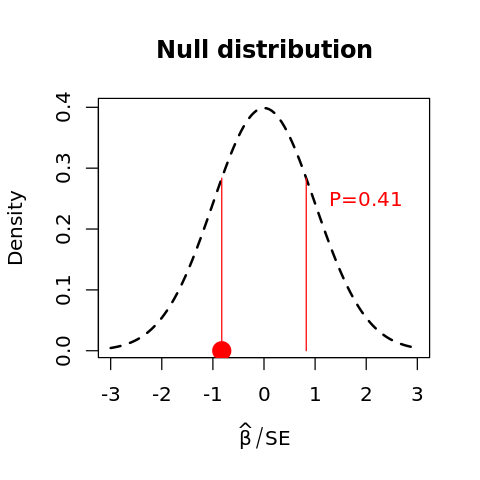

In [28]:
options(repr.plot.width=4, repr.plot.height=4)
x.grid = seq(-3, 3, 0.05) # to define the plotting region
plot(x.grid, dt(x.grid, df = n-2), lty = 2, lwd = 2, t = "l",
xlab = expression(hat(beta)/SE), ylab = "Density", main = "Null distribution") #null distribution of t-stat.

points(t.stat, 0, pch = 19, cex = 2, col = "red")
segments(t.stat*c(1,-1), c(0,0), t.stat*c(1,-1), rep(dnorm(t.stat,0,1),2), col="red")
text(2, 0.25, paste0("P=",signif(summary(lm.fit)$coeff[2,4],3)), col="red")

The p-value is the probability mass outside the red segments, i.e. the sum of the two tail probabilities.

In [20]:
set.seed(6102017)
n = 1000 #individuals
p = 5000 #variables measured on each individual
X = matrix( rnorm(n*p), n, p) #just random variables
y = rnorm(n) #outcome variable that is not associated with any of x
#by mean-centering y and each x, we can ignore intercept terms (since they are 0, see Lecture 0)
X = as.matrix( scale(X, scale = F) ) #mean-centers columns of X to have mean 0
y = as.vector( scale(y, scale = F) )
#apply lm to each column of X separately and without intercept (see Lecture 0.)
lm.res = apply(X, 2 , function(x) summary(lm(y ~ -1 + x))$coeff[1,])

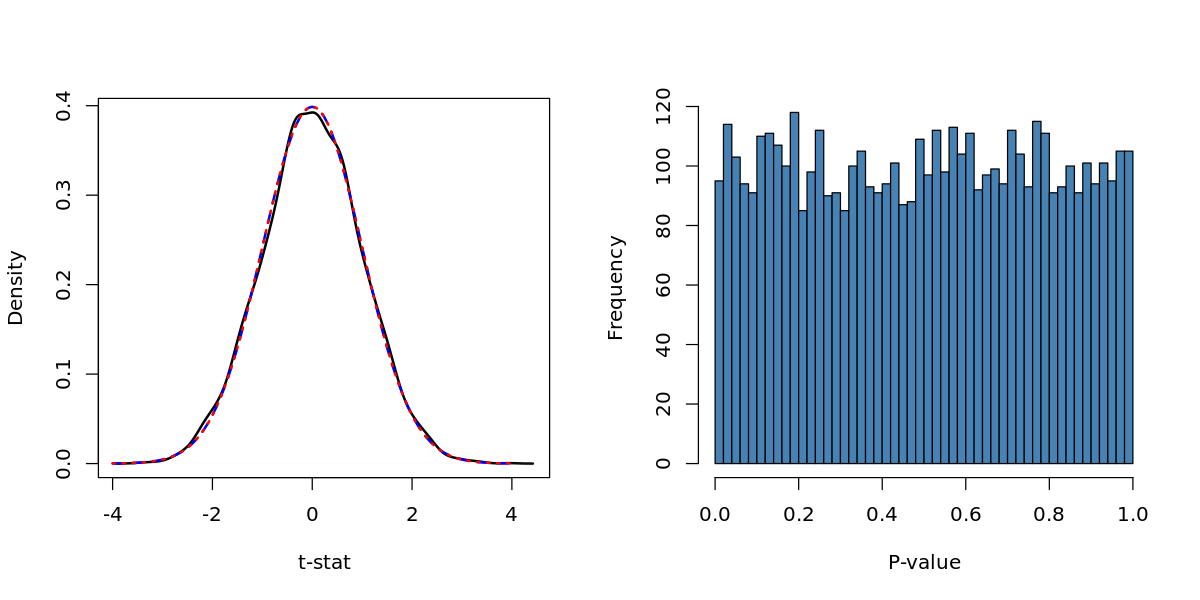

In [25]:
# lm.res has 4 rows: beta, SE, t-stat and P-value
pval = lm.res[4,] #pick P-values
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(density(lm.res[3,]), sub = "", xlab = "t-stat", main = "", lwd = 2) #should be t with n-2 df
curve(dt(x, df = n-2), from = -4, to = 4, add = T, col = "blue", lwd = 2, lty = 2) #t distr in blue
curve(dnorm(x, 0, 1), from = -4, to = 4, add = T, col = "red", lwd = 2, lty = 3)#normal distr in red
hist(pval, breaks = 50, xlab = "P-value", main = "", col = "steelblue")

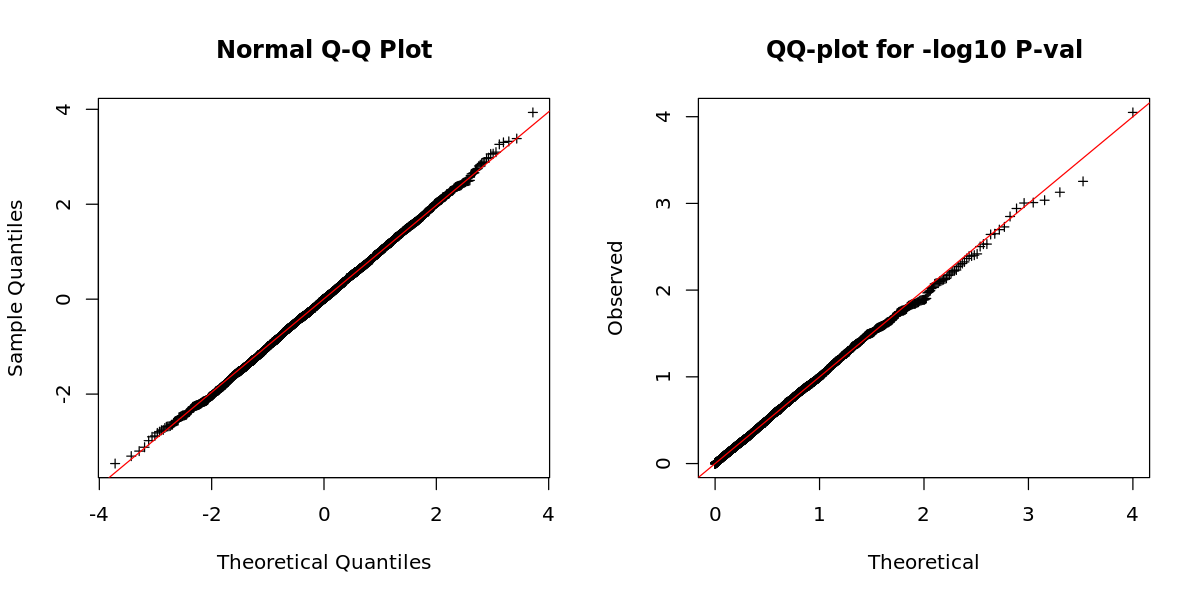

In [26]:
par(mfrow=c(1,2)) #Let's make qqplots for t-stats and for P-values
qqnorm(lm.res[3,], cex = 0.7, pch = 3); qqline(lm.res[3,], col = "red")
#((1:p)-0.5) / p gives us
#p equally spaced values in (0,1) to represent quantiles of Uniform(0,1).
qqplot(-log10( ((1:p)-0.5) / p), -log10(pval), xlab = "Theoretical",
ylab = "Observed", main = "QQ-plot for -log10 P-val", cex = 0.7, pch = 3)
abline(0, 1, col = "red")

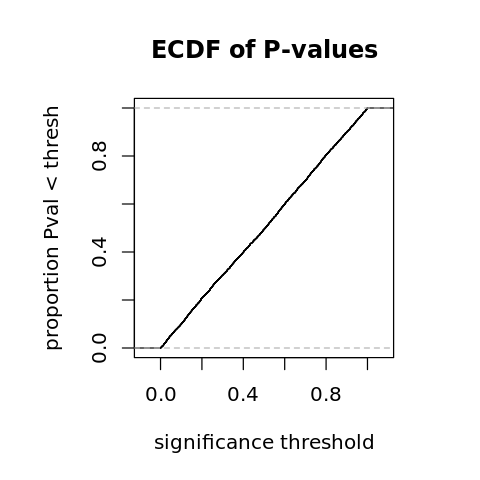

In [29]:
options(repr.plot.width=4, repr.plot.height=4)
par(pty = "s")
plot(ecdf(pval), xlab = "significance threshold", ylab="proportion Pval < thresh",
main = "ECDF of P-values")

In [30]:
sum( pval < 0.05 )

[1] 259